Представьте, что вы работаете аналитиком в компании, которая занимается арендой велосипедов. Коллега из офиса в Лондоне прислал вам данные за два года: с 4 января 2015 по 3 января 2017. Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.

## Задания
Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.
Постройте график по числу поездок по дате и времени.
Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.
Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.
Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.
Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.
Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.
Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.

## Описание данных
* timestamp – дата и время (точность до часа)
* cnt – количество аренд велосипедов за этот час
* t1 – температура, в С
* t2 – температура "ощущается как", в С 
* hum – влажность (%)
* wind_speed – скорость ветра, км/ч
* weather_code – погодные условия:

1 – ясно (SKC)

2 – преимущественно ясно / встречаются отдельные облака (SCT)

3 – облачно / значительные облака (BKN)

4 – пасмурно (OVC)

7 – небольшой дождь Rain/ light Rain shower/ Light rain 

10 – дождь с грозой

26 – снегопад 

94 – ледяной туман (да, такое бывает!)

* isholiday – является ли день праздником (1 – праздник, 0 – нет)
* isweekend –  является ли день выходным (1 – выходной, 0 – нет)
* season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)

### Задание 1

**Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.**

**Есть ли в данных пропущенные значения?**

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.style.use('Solarize_Light2')

sns.set(

font_scale=2,

style="whitegrid",

rc={'figure.figsize':(20,7)}

    )

%matplotlib inline

In [3]:
london = pd.read_csv('C:/Users/Александр/pj/karpov_courses/Statistics/Miniprojects/Datasets/london.csv')
london.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
london.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

* Да, но совсем немного
* Да, во многих
* **Нет**


### Задание 2

**Для начала попробуем посмотреть на число поездок по датам и времени. Постройте график, где:**

* по оси x – дата (timestamp)
* по оси y – число поездок (cnt)

**Выберите верные утверждения:**

Hint: sns.lineplot 

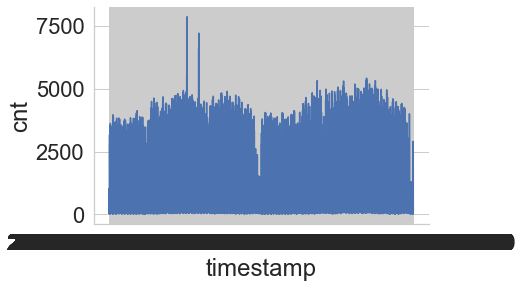

In [9]:
sns.lineplot(data=london, x='timestamp', y='cnt')
sns.despine()

* В выходные поездок точно меньше, чем в будние дни
* **Очень сложно что-то понять, нужно преобразовать данные, чтобы увидеть тренды**
* Случались только аномальные скачки вверх, вниз ничего не падало

### Задание 3

**Отлично! Предположим, что данные действительно нужно немного преобразовать. В этом нам поможет resample, с которым вы могли столкнуться в дополнительных темах pandas. Этот метод позволяет преобразовать данные и применить к какому-либо столбцу другой метод (напр. sum). Так можно рассчитать показатели, например, за весь день или месяц, имея данные с точностью до минут. Например, посчитать сумму показателя по дням, имея данные по часам, можно следующим образом:**
```python
data.resample(rule='D').column_name.sum() #способ 1
data.resample(rule='D').agg({'column_name':'sum'}) #способ 2, эквивалентный предыдущему
```

**Агрегируйте число поездок по дням и визуализируйте результат. Что вы можете сказать о полученном графике?**

In [12]:
london.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [15]:
london.timestamp = pd.to_datetime(london.timestamp)

In [18]:
london.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

* Максимальное число аренд за день – более 1 000 000
* **Встречаются как очень резкие скачки числа аренд, так и падения**
* Число аренд зимой и летом никак не различается
* **Максимальное число аренд за день составляет более 70 000**
* Встречаются только резкие скачки вверх
* Максимальное число аренд за день не превышало 8 000
* **Зимой число аренд меньше, чем летом**


## Задание 4

**Итак, вы обнаружили на графике некоторые скачки. Давайте проверим, что же могло произойти в тот день 🤔.**

**Для этого разделим дальнейшие действия на несколько этапов:**

* сначала посчитаем скользящее среднее, чтобы сгладить ряд
* далее – разницу между наблюдаемыми и сглаженными значениями
* определим верхние и нижние границы 99% доверительного интервала 
* найдем причины аномалий!

**На данном шаге возьмите агрегированные данные по дням с предыдущего шага и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.**